# Regression on California house prices

California Housing<br>
This is a dataset obtained from the StatLib repository. Here is the included description:

S&P Letters Data
We collected information on the variables using all the block groups in California from the 1990 Cens us. In this sample a block group on average includes 1425.5 individuals living in a geographically co mpact area. Naturally, the geographical area included varies inversely with the population density. W e computed distances among the centroids of each block group as measured in latitude and longitude. W e excluded all the block groups reporting zero entries for the independent and dependent variables. The final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value).

The file contains all the the variables. Specifically, it contains median house value, median income, housing median age, total rooms, total bedrooms, population, households, latitude, and longitude in that order.

Ref: http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

**Imports**

In [3]:
import seaborn as sns
import os
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.datasets import fetch_california_housing as skdataset
from sklearn.model_selection import train_test_split as sksplit, cross_val_score, GridSearchCV
from sklearn.preprocessing import scale
from sklearn import linear_model as lm
from matplotlib import pyplot as plt

**Loading dataset**

In [5]:
raw_data = skdataset()

In [6]:
target=raw_data['target']

In [147]:
features=raw_data['feature_names']

In [8]:
raw_data_values=raw_data['data']
MedInc = raw_data_values.T[features.index('MedInc')]
HouseAge = raw_data_values.T[features.index('HouseAge')]
AveRooms = raw_data_values.T[features.index('AveRooms')]
AveBedrms = raw_data_values.T[features.index('AveBedrms')]
Population = raw_data_values.T[features.index('Population')]
AveOccup = raw_data_values.T[features.index('AveOccup')]
Latitude = raw_data_values.T[features.index('Latitude')]
Longitude = raw_data_values.T[features.index('Longitude')]

# Step-1

**Visualize the univariate distribution of each feature, and the distribution of the target**

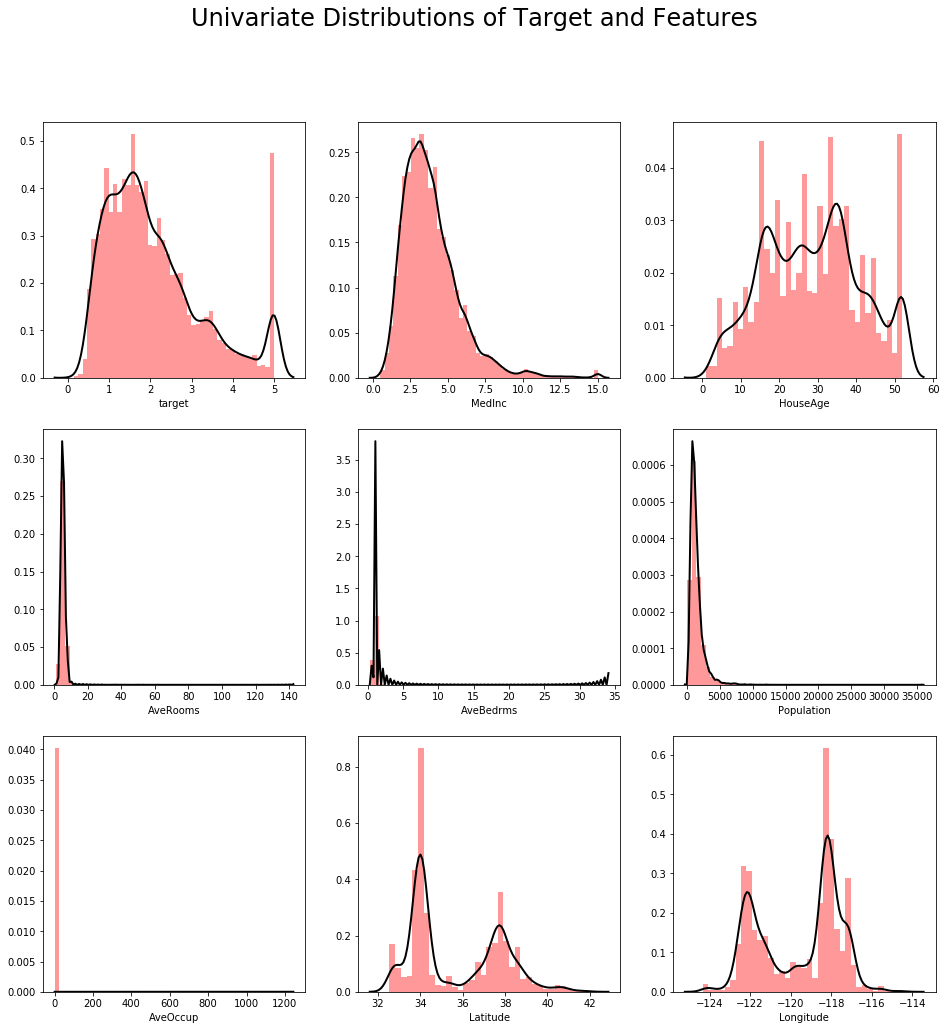

In [123]:
fig1, ax1 = plt.subplots(3,3,figsize=(16,16))

sns.distplot(target,ax=ax1[0,0],kde_kws={"color": "k", "lw": 2},hist_kws={"color":"r"})
ax1[0,0].set(xlabel='target')
sns.distplot(MedInc,ax=ax1[0,1],kde_kws={"color": "k", "lw": 2},hist_kws={"color":"r"})
ax1[0,1].set(xlabel='MedInc')
sns.distplot(HouseAge,ax=ax1[0,2],kde_kws={"color": "k", "lw": 2},hist_kws={"color":"r"})
ax1[0,2].set(xlabel='HouseAge')

sns.distplot(AveRooms,ax=ax1[1,0],kde_kws={"color": "k", "lw": 2},hist_kws={"color":"r"})
ax1[1,0].set(xlabel='AveRooms')
sns.distplot(AveBedrms,ax=ax1[1,1],kde_kws={"color": "k", "lw": 2},hist_kws={"color":"r"})
ax1[1,1].set(xlabel='AveBedrms')
sns.distplot(Population,ax=ax1[1,2],kde_kws={"color": "k", "lw": 2},hist_kws={"color":"r"})
ax1[1,2].set(xlabel='Population')

sns.distplot(AveOccup,ax=ax1[2,0],kde_kws={"color": "k", "lw": 2},hist_kws={"color":"r"})
ax1[2,0].set(xlabel='AveOccup')
sns.distplot(Latitude,ax=ax1[2,1],kde_kws={"color": "k", "lw": 2},hist_kws={"color":"r"})
ax1[2,1].set(xlabel='Latitude')
sns.distplot(Longitude,ax=ax1[2,2],kde_kws={"color": "k", "lw": 2},hist_kws={"color":"r"})
ax1[2,2].set(xlabel='Longitude')
plt.suptitle('Univariate Distributions of Target and Features',fontsize=24)
plt.show()

In the above plots we see that there are outliers in the features characterized by a long tail in the distribution which is prominent in the features - AveOccup, Population, AveBedrms, AveRooms.

When we shrink the range of the x limits to remove the outliers from our plots, we see a clear distribution of the plots as shown below:


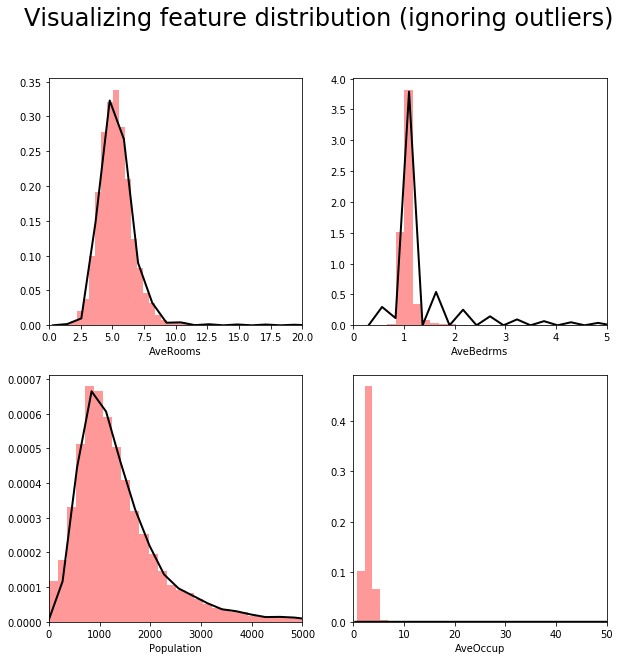

In [129]:
fig3, ax3 = plt.subplots(2,2,figsize=(10,10))

sns.distplot(AveRooms,ax=ax3[0,0],bins=300,kde_kws={"color": "k", "lw": 2},hist_kws={"color":"r"})
ax3[0,0].set(xlabel='AveRooms',xlim=(0,20))
sns.distplot(AveBedrms,ax=ax3[0,1],bins=200,kde_kws={"color": "k", "lw": 2},hist_kws={"color":"r"})
ax3[0,1].set(xlabel='AveBedrms',xlim=(0,5))
sns.distplot(Population,ax=ax3[1,0],bins=200,kde_kws={"color": "k", "lw": 2},hist_kws={"color":"r"})
ax3[1,0].set(xlabel='Population',xlim=(0,5000))
sns.distplot(AveOccup,ax=ax3[1,1],bins=800,kde_kws={"color": "k", "lw": 2},hist_kws={"color":"r"})
ax3[1,1].set(xlabel='AveOccup',xlim=(0,50))
plt.suptitle('Visualizing feature distribution (ignoring outliers)',fontsize=24)
plt.show()

# Step-2

**Visualize the dependency of the target on each feature (2d scatter plot)**

In order to get a clear visualization of the dependency of the target on features, I ignored the outliers from my feature data by setting appropriate x limits and then plotted the graphs.

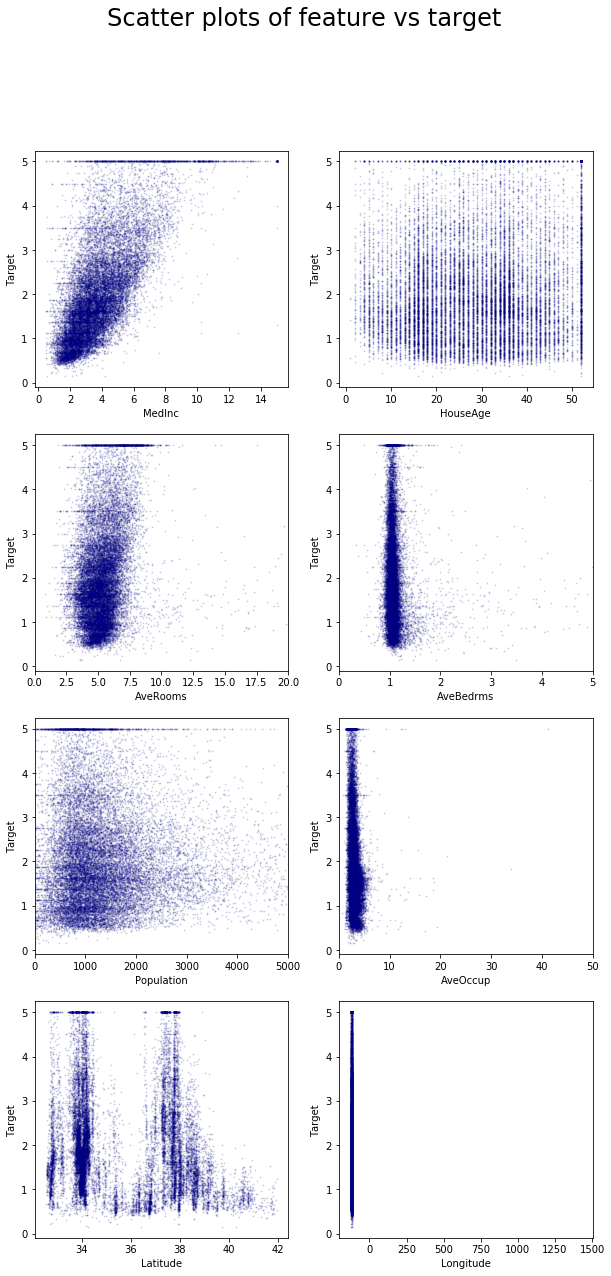

In [153]:
fig2, ax2 = plt.subplots(4,2,figsize=(10,20))
scatter_kws_args={'alpha':0.13,'s':1,'color':'Navy'}
#sns.regplot(x = target,ax=ax1[0,0])
sns.regplot(x=MedInc,y = target,ax=ax2[0,0],fit_reg=False,scatter_kws=scatter_kws_args)
ax2[0,0].set(xlabel='MedInc',ylabel='Target')
sns.regplot(x=HouseAge,y = target,ax=ax2[0,1],fit_reg=False,scatter_kws=scatter_kws_args)
ax2[0,1].set(xlabel='HouseAge',ylabel='Target')
sns.regplot(x=AveRooms,y = target,ax=ax2[1,0],fit_reg=False,scatter_kws=scatter_kws_args)
ax2[1,0].set(xlabel='AveRooms',ylabel='Target',xlim=(0,20))
sns.regplot(x=AveBedrms,y = target,ax=ax2[1,1],fit_reg=False,scatter_kws=scatter_kws_args)
ax2[1,1].set(xlabel='AveBedrms',ylabel='Target',xlim=(0,5))
sns.regplot(x=Population,y = target,ax=ax2[2,0],fit_reg=False,scatter_kws=scatter_kws_args)
ax2[2,0].set(xlabel='Population',ylabel='Target',xlim=(0,5000))
sns.regplot(x=AveOccup,y = target,ax=ax2[2,1],fit_reg=False,scatter_kws=scatter_kws_args)
ax2[2,1].set(xlabel='AveOccup',ylabel='Target',xlim=(0,50))
sns.regplot(x=Latitude,y = target,ax=ax2[3,0],fit_reg=False,scatter_kws=scatter_kws_args)
ax2[3,0].set(xlabel='Latitude',ylabel='Target')
sns.regplot(x=Longitude,y = target,ax=ax2[3,1],fit_reg=False,scatter_kws=scatter_kws_args)
ax2[3,1].set(xlabel='Longitude',ylabel='Target')
plt.suptitle('Scatter plots of feature vs target',fontsize=24)
plt.show()

# Step-3

**Split data in training and test set. Evaluate Linear Regression (OLS), Ridge, Lasso and
ElasticNet using cross-validation with the default parameters**

In [93]:
x_train,x_test,y_train,y_test=sksplit(raw_data_values,target)

linear_regression_accuracy = np.mean(cross_val_score(lm.LinearRegression(),x_train,y_train))
ridge_regression_accuracy = np.mean(cross_val_score(lm.Ridge(),x_train,y_train))
lasso_regression_accuracy = np.mean(cross_val_score(lm.Lasso(),x_train,y_train))
elasticnet_accuracy = np.mean(cross_val_score(lm.ElasticNet(),x_train,y_train))
models=['linear_regression','ridge_regression','lasso_regression','elasticnet']
model_scores=dict(zip(models,[linear_regression_accuracy,ridge_regression_accuracy,lasso_regression_accuracy,elasticnet_accuracy]))
model_scores_pd = pd.DataFrame(model_scores,index=[0])
model_scores_pd

,elasticnet,lasso_regression,linear_regression,ridge_regression
0,0.427989,0.289325,0.604714,0.604738


**Does scaling the data with StandardScaler help?**

In [94]:
x_train_scaled=scale(x_train)
x_test_scaled=scale(x_test)

scaled_linear_regression_accuracy = np.mean(cross_val_score(lm.LinearRegression(),x_train_scaled,y_train))
scaled_ridge_regression_accuracy = np.mean(cross_val_score(lm.Ridge(),x_train_scaled,y_train))
scaled_lasso_regression_accuracy = np.mean(cross_val_score(lm.Lasso(),x_train_scaled,y_train))
scaled_elasticnet_accuracy = np.mean(cross_val_score(lm.ElasticNet(),x_train_scaled,y_train))

model_scores_scaled_data=dict(zip(models,[scaled_linear_regression_accuracy,scaled_ridge_regression_accuracy,scaled_lasso_regression_accuracy,scaled_elasticnet_accuracy]))

scaled_model_scores_pd = pd.DataFrame(model_scores_scaled_data,index=[0])
model_scores_pd

,elasticnet,lasso_regression,linear_regression,ridge_regression
0,0.427989,0.289325,0.604714,0.604738


In [131]:
diff_due_to_scaling={}
for k,v in model_scores.items():
    diff_due_to_scaling[k] = model_scores_scaled_data[k] - v
model_diff_pd = pd.DataFrame(diff_due_to_scaling,index=[0])
model_diff_pd

,elasticnet,lasso_regression,linear_regression,ridge_regression
0,-0.220256,-0.289473,-2.220446e-16,-0.00001


**We see above that there is no improvement in the performance after scaling the features **

# Step-4

**Tune the parameters of the models using GridSearchCV. <br>
Do the results improve? <br>
Visualize the dependence of the validation score on the parameters for Ridge, Lasso and
ElasticNet**

In [132]:
gridsearch_cv_model_scores={}

Tuning parameters for Ridge Regression:

In [133]:
param_grid = {'alpha': np.logspace(-3, 3, 13)}
grid = GridSearchCV(lm.Ridge(), param_grid, cv=10,return_train_score=True)
grid.fit(x_train, y_train)
#print("test-set score: {:.3f}".format(grid.score(x_test, y_test)))

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-03, 3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01,
       3.16228e-01, 1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01,
       1.00000e+02, 3.16228e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

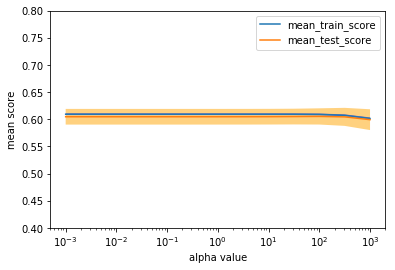

In [134]:
grid_results = pd.DataFrame(grid.cv_results_)
y_train_mean = grid_results['mean_train_score']
y_train_std = grid_results['std_train_score']
y_test_mean = grid_results['mean_test_score']
y_test_std = grid_results['std_test_score']
gridsearch_cv_model_scores['ridge_regression'] =np.mean(y_test_mean)
x = param_grid['alpha']
line1,=plt.plot(x,y_train_mean)
line2,=plt.plot(x,y_test_mean)
plt.fill_between(x, y_test_mean - y_test_std,y_test_mean + y_test_std, facecolor = 'orange', alpha = 0.5)
plt.fill_between(x, y_train_mean - y_train_std,y_train_mean + y_train_std, facecolor = 'blue', alpha = 0.5)
plt.xticks(x)
plt.legend(handles=[line1,line2])
plt.xlabel('alpha value')
plt.ylabel('mean score')
plt.ylim(0.4,0.8)
plt.xscale('log')

In [135]:
ridge = grid.best_estimator_
# plt.scatter(range(x_train.shape[1]), ridge.coef_,
#             c=np.sign(ridge.coef_), cmap="bwr_r")

Tuning parameters for Lasso Regression:

In [136]:
param_grid = {'alpha': np.logspace(-3, 3, 13)}
grid = GridSearchCV(lm.Lasso(), param_grid, cv=10,return_train_score=True)
grid.fit(x_train, y_train)
# print("test-set score: {:.3f}".format(grid.score(x_test, y_test)))

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-03, 3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01,
       3.16228e-01, 1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01,
       1.00000e+02, 3.16228e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

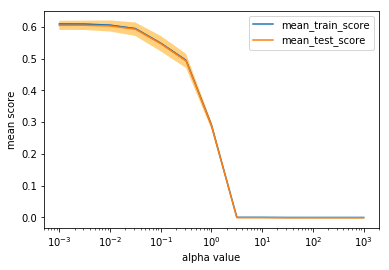

In [137]:
#fig, lasso_ax = plt.subplots()
grid_results = pd.DataFrame(grid.cv_results_)
y_train_mean = grid_results['mean_train_score']
y_train_std = grid_results['std_train_score']
y_test_mean = grid_results['mean_test_score']
y_test_std = grid_results['std_test_score']
gridsearch_cv_model_scores['lasso_regression'] =np.mean(y_test_mean)
x = param_grid['alpha']
line1,=plt.plot(x,y_train_mean)
line2,=plt.plot(x,y_test_mean)
plt.fill_between(x, y_test_mean - y_test_std,y_test_mean + y_test_std, facecolor = 'orange', alpha = 0.5)
plt.fill_between(x, y_train_mean - y_train_std,y_train_mean + y_train_std, facecolor = 'blue', alpha = 0.5)
plt.xticks(x)
plt.xlabel('alpha value')
plt.ylabel('mean score')
plt.legend(handles=[line1,line2])
plt.xscale('log')


In [138]:
lasso = grid.best_estimator_
# plt.scatter(range(x_train.shape[1]), lasso.coef_,
#             c=np.sign(lasso.coef_), cmap="bwr_r")

Tuning parameters for Elastic Nets:

In [139]:
param_grid = {'alpha': np.logspace(-3, 3, 13)}
grid = GridSearchCV(lm.ElasticNet(), param_grid, cv=10,return_train_score=True)
grid.fit(x_train, y_train)
# print("test-set score: {:.3f}".format(grid.score(x_test, y_test)))

GridSearchCV(cv=10, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-03, 3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01,
       3.16228e-01, 1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01,
       1.00000e+02, 3.16228e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

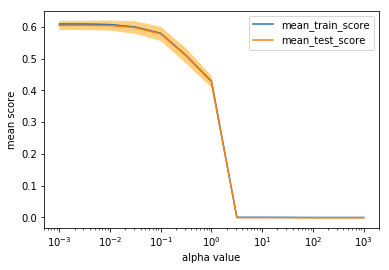

In [140]:
grid_results = pd.DataFrame(grid.cv_results_)
y_train_mean = grid_results['mean_train_score']
y_train_std = grid_results['std_train_score']
y_test_mean = grid_results['mean_test_score']
y_test_std = grid_results['std_test_score']
gridsearch_cv_model_scores['elasticnets'] =np.mean(y_test_mean)
x = param_grid['alpha']
line1, = plt.plot(x,y_train_mean)
line2, = plt.plot(x,y_test_mean)
plt.fill_between(x, y_test_mean - y_test_std,y_test_mean + y_test_std, facecolor = 'orange', alpha = 0.5)
plt.fill_between(x, y_train_mean - y_train_std,y_train_mean + y_train_std, facecolor = 'blue', alpha = 0.5)
plt.xticks(x)
plt.xlabel('alpha value')
plt.ylabel('mean score')
plt.legend(handles= [line1,line2])
plt.xscale('log')

In [141]:
elasticnet = grid.best_estimator_

In [142]:
gridsearch_cv_model_scores_pd=pd.DataFrame(gridsearch_cv_model_scores,index=[0])
gridsearch_cv_model_scores_pd

,elasticnets,lasso_regression,ridge_regression
0,0.301664,0.286839,0.604316


In [143]:
scaled_model_scores_pd[['elasticnet','lasso_regression','ridge_regression']]

,elasticnet,lasso_regression,ridge_regression
0,0.207734,-0.000147,0.604728


**The model score further improved after using GridSearch for Lasso and Ridge Regression but the performance worsened for ElasticNets**

# Step-5 

**Visualize the coefficients of the resulting models. Do they agree on which features are
important?**

Text(0,0.5,'coefficient')

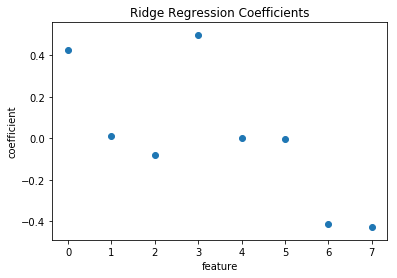

In [144]:
plt.scatter(range(x_train.shape[1]), ridge.coef_)
plt.title('Ridge Regression Coefficients')
plt.xlabel('feature')
plt.ylabel('coefficient')

Text(0,0.5,'coefficient')

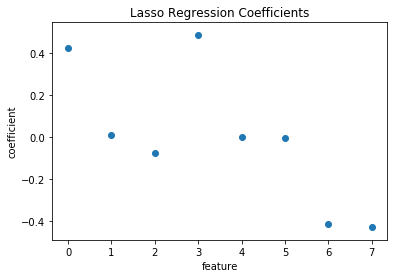

In [145]:
plt.scatter(range(x_train.shape[1]), lasso.coef_)
plt.title('Lasso Regression Coefficients')
plt.xlabel('feature')
plt.ylabel('coefficient')

Text(0,0.5,'coefficient')

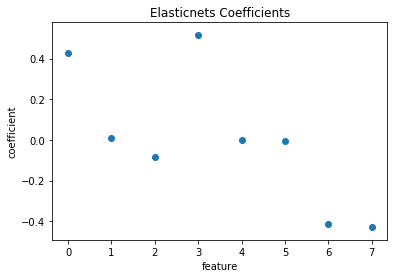

In [146]:
plt.scatter(range(x_train.shape[1]), elasticnet.coef_)
plt.title('Elasticnets Coefficients')
plt.xlabel('feature')
plt.ylabel('coefficient')

In [152]:
coef_comparison_df=pd.DataFrame(index=['feature_'+str(i) for i in range(0,8)])
coef_comparison_df['Ridge']=ridge.coef_
coef_comparison_df['Lasso']=lasso.coef_
coef_comparison_df['Elasticnet']=elasticnet.coef_
coef_comparison_df

,Ridge,Lasso,Elasticnet
feature_0,4.248285e-01,4.232220e-01,0.426436
feature_1,9.963907e-03,9.976943e-03,0.009918
feature_2,-8.056154e-02,-7.745544e-02,-0.083727
feature_3,4.979392e-01,4.840198e-01,0.515615
feature_4,-9.334735e-07,-8.098674e-07,-0.000001
feature_5,-3.330204e-03,-3.303908e-03,-0.003321
feature_6,-4.153471e-01,-4.151602e-01,-0.416228
feature_7,-4.281368e-01,-4.277338e-01,-0.429284


**We see in the table above that Ridge Regression and Lasso Regression Coefficients agree 
while the Elasticnet coefficients do not agree **